In [ ]:
# http://blog.yhat.com/posts/rpy2-combing-the-power-of-r-and-python.html
# R_HOME C:\Program Files\R\R-3.3.1 
# R_USER C:\Users\{username}
# C:\Program Files\R\R-3.3.1\bin

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

ts = robjects.r('ts')
forecast = importr('forecast')

In [4]:
import pandas as pd

traindf = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/UKgas.csv', index_col=0)
time_dict = {'0': '01', '25': '04', '5': '07', '75': '10'}
traindf['time'] = traindf['time'].astype(str).apply(
    lambda x: pd.to_datetime('{0}-{1}-01'.format(x.split('.')[0], time_dict[x.split('.')[1]]))
)
traindf.set_index('time', inplace=True)
traindf.columns = ['Price']
traindf.head()

,Price
time,
1960-01-01,160.1
1960-04-01,129.7
1960-07-01,84.8
1960-10-01,120.1
1961-01-01,160.1


In [5]:
from rpy2.robjects import pandas2ri

pandas2ri.activate()

rdata = ts(traindf.Price.values, frequency=4)
fit = forecast.auto_arima(rdata)
forecast_output = forecast.forecast(fit, h=16, level=(95.0))

In [6]:
index = pd.date_range(start=traindf.index.max(),periods=len(forecast_output[3])+1,freq='QS')[1:]
forecast = pd.Series(forecast_output[3],index=index)
lowerpi = pd.Series(forecast_output[4],index=index)
upperpi = pd.Series(forecast_output[5],index=index)

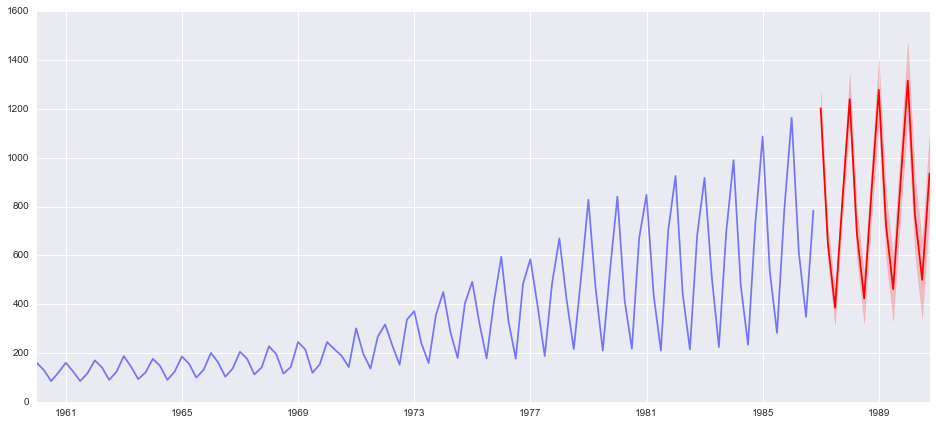

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

fig = plt.figure(figsize=(16, 7))
ax = plt.axes()
ax.plot(traindf.Price.index, traindf.Price.values, color='blue', alpha=0.5)
ax.plot(forecast.index, forecast.values, color='red')
ax.fill_between(forecast.index, lowerpi.values, upperpi.values, alpha=0.2, color='red')
plt.show()

In [8]:
rstring="""
    function(testdata){
        library(forecast)
        fitted_model<-auto.arima(testdata)
        forecasted_data<-forecast(fitted_model, h=16, level=c(95))
        outdf<-data.frame(forecasted_data$mean, forecasted_data$lower, forecasted_data$upper)
        colnames(outdf)<-c('forecast', 'lower_95_pi', 'upper_95_pi')
        outdf
    }
"""
rfunc = robjects.r(rstring)

rdata = ts(traindf.Price.values, frequency=4)
r_df = rfunc(rdata)

In [9]:
forecast_df = pandas2ri.ri2py(r_df)
forecast_df.index = pd.date_range(start=traindf.index.max(), periods=len(forecast_df)+1, freq='QS')[1:]

forecast_df

,forecast,lower_95_pi,upper_95_pi
1987-01-01,1201.895643,1132.969980,1270.821305
1987-04-01,651.095643,581.999757,720.191529
1987-07-01,385.395643,316.129953,454.661333
1987-10-01,820.795643,751.360563,890.230723
1988-01-01,1239.891286,1138.581601,1341.200971
1988-04-01,689.091286,587.318843,790.863728
1988-07-01,423.391286,321.158180,525.624391
1988-10-01,858.791286,756.099584,961.482988
1989-01-01,1277.886929,1148.555295,1407.218562
1989-04-01,727.086929,596.940390,857.233467


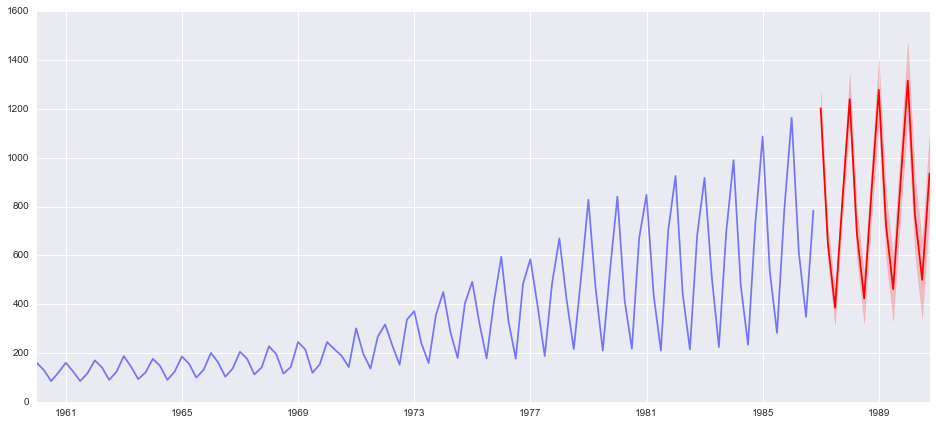

In [10]:
fig = plt.figure(figsize=(16, 7));
ax = plt.axes()
ax.plot(traindf.Price.index, traindf.Price.values, color='blue', alpha=0.5)
ax.plot(forecast_df.index, forecast_df.forecast.values, color='red')
ax.fill_between(forecast_df.index, forecast_df['lower_95_pi'], forecast_df['upper_95_pi'], alpha=0.2, color='red')
plt.show()

In [2]:







import rpy2.robjects.packages as rpackages
utils = rpackages.importr('utils')

utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('ggplot2', 'hexbin')
from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(packnames))

packnames = ('forecast')
from rpy2.robjects.vectors import StrVector
utils.install_packages('forecast')

rpy2.rinterface.NULL